<a href="https://colab.research.google.com/github/Massato01/ProjetoCalculoNumericoRegressaoLinear/blob/main/ProjetoCalculoNumerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [536]:
import pandas                  as pd
import numpy                   as np
import sympy                   as sy
import scipy                   as sp
import matplotlib.pyplot       as plt
import seaborn                 as sns
import plotly.express          as px
import statsmodels.formula.api as sm
import statsmodels.api         as sm_api
from   scipy.stats             import pearsonr
from   sklearn.linear_model    import LinearRegression
from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing   import StandardScaler, MinMaxScaler
from   sklearn.metrics         import r2_score

# **Importação e tratamento dos dados**

In [537]:
df_wine = pd.read_csv('/content/winequality-red.csv')
df_wine.shape

(1599, 12)

## Verificando as colunas presentes

In [538]:
[i for i in df_wine.columns]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

## Verificando o tipo dos dados

In [539]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Verificando NaN

In [540]:
df_wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# **Análises preliminares**

In [541]:
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [542]:
unique, quant = np.unique(df_wine['quality'], return_counts=True)
print(f'Unicos: {unique}\nQuanti: {quant}')

Unicos: [3 4 5 6 7 8]
Quanti: [ 10  53 681 638 199  18]


## Estatística descritiva

In [543]:
df_wine.describe().round(2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
min         0.01                 1.00                  6.00     0.99     2.74   
25%         0.07                 7.00                 22.00     1.00     3.21   
50%         0.08                14.00                 38.00     1.00     3.31   
75%         0.09                21.00                 62.00     1.00     3.40   
max         0.61                72.00                289.00     1.00     4.01   

       sulphates  alcohol  quality  
count    1599.00  1599.00  1599.00  
mean        0.66    10.42     5.64  
std         0.17     1.07     0.81  
min         0.33     8.40     3.00  
25%         0.55     9.50     5.00  
50%         0.62    10.20     6.00  
75%         0.73    11.10     6.00  
max         2.00    14.90     8.00

> * % representa a quantidade de valores são menores que a porcentagem dada

## Mapa de correlação

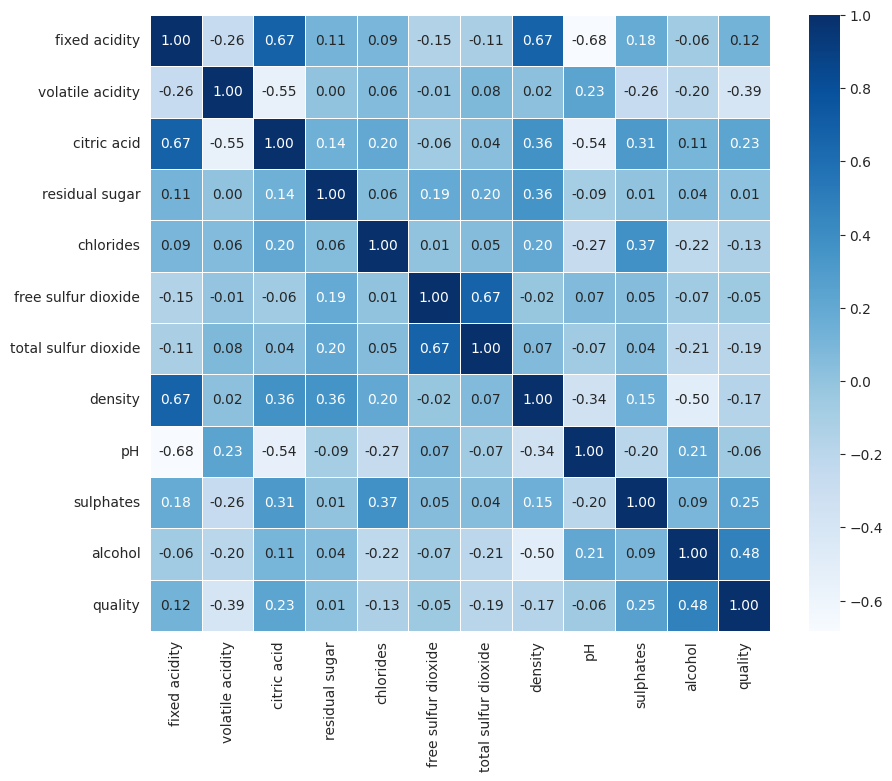

In [544]:
corr = df_wine.corr().round(4)
plt.figure(figsize=(10,8  ))
ax = sns.heatmap(corr, annot = True, fmt=".2f", linewidths=.6, cmap="Blues")

> ### Correlações fortes (exemplos):
> * fixed acidity & citric acid
> * fixed acidity & density
> * free sulfur dioxide & total sulfur dioxide

**Obs: Class possui forte correlação com todas as colunas**

# **Análises gráficas**

In [545]:
sns.set_palette("vlag")
sns.set_style("darkgrid")

## Visualizando o comportamento entre as colunas

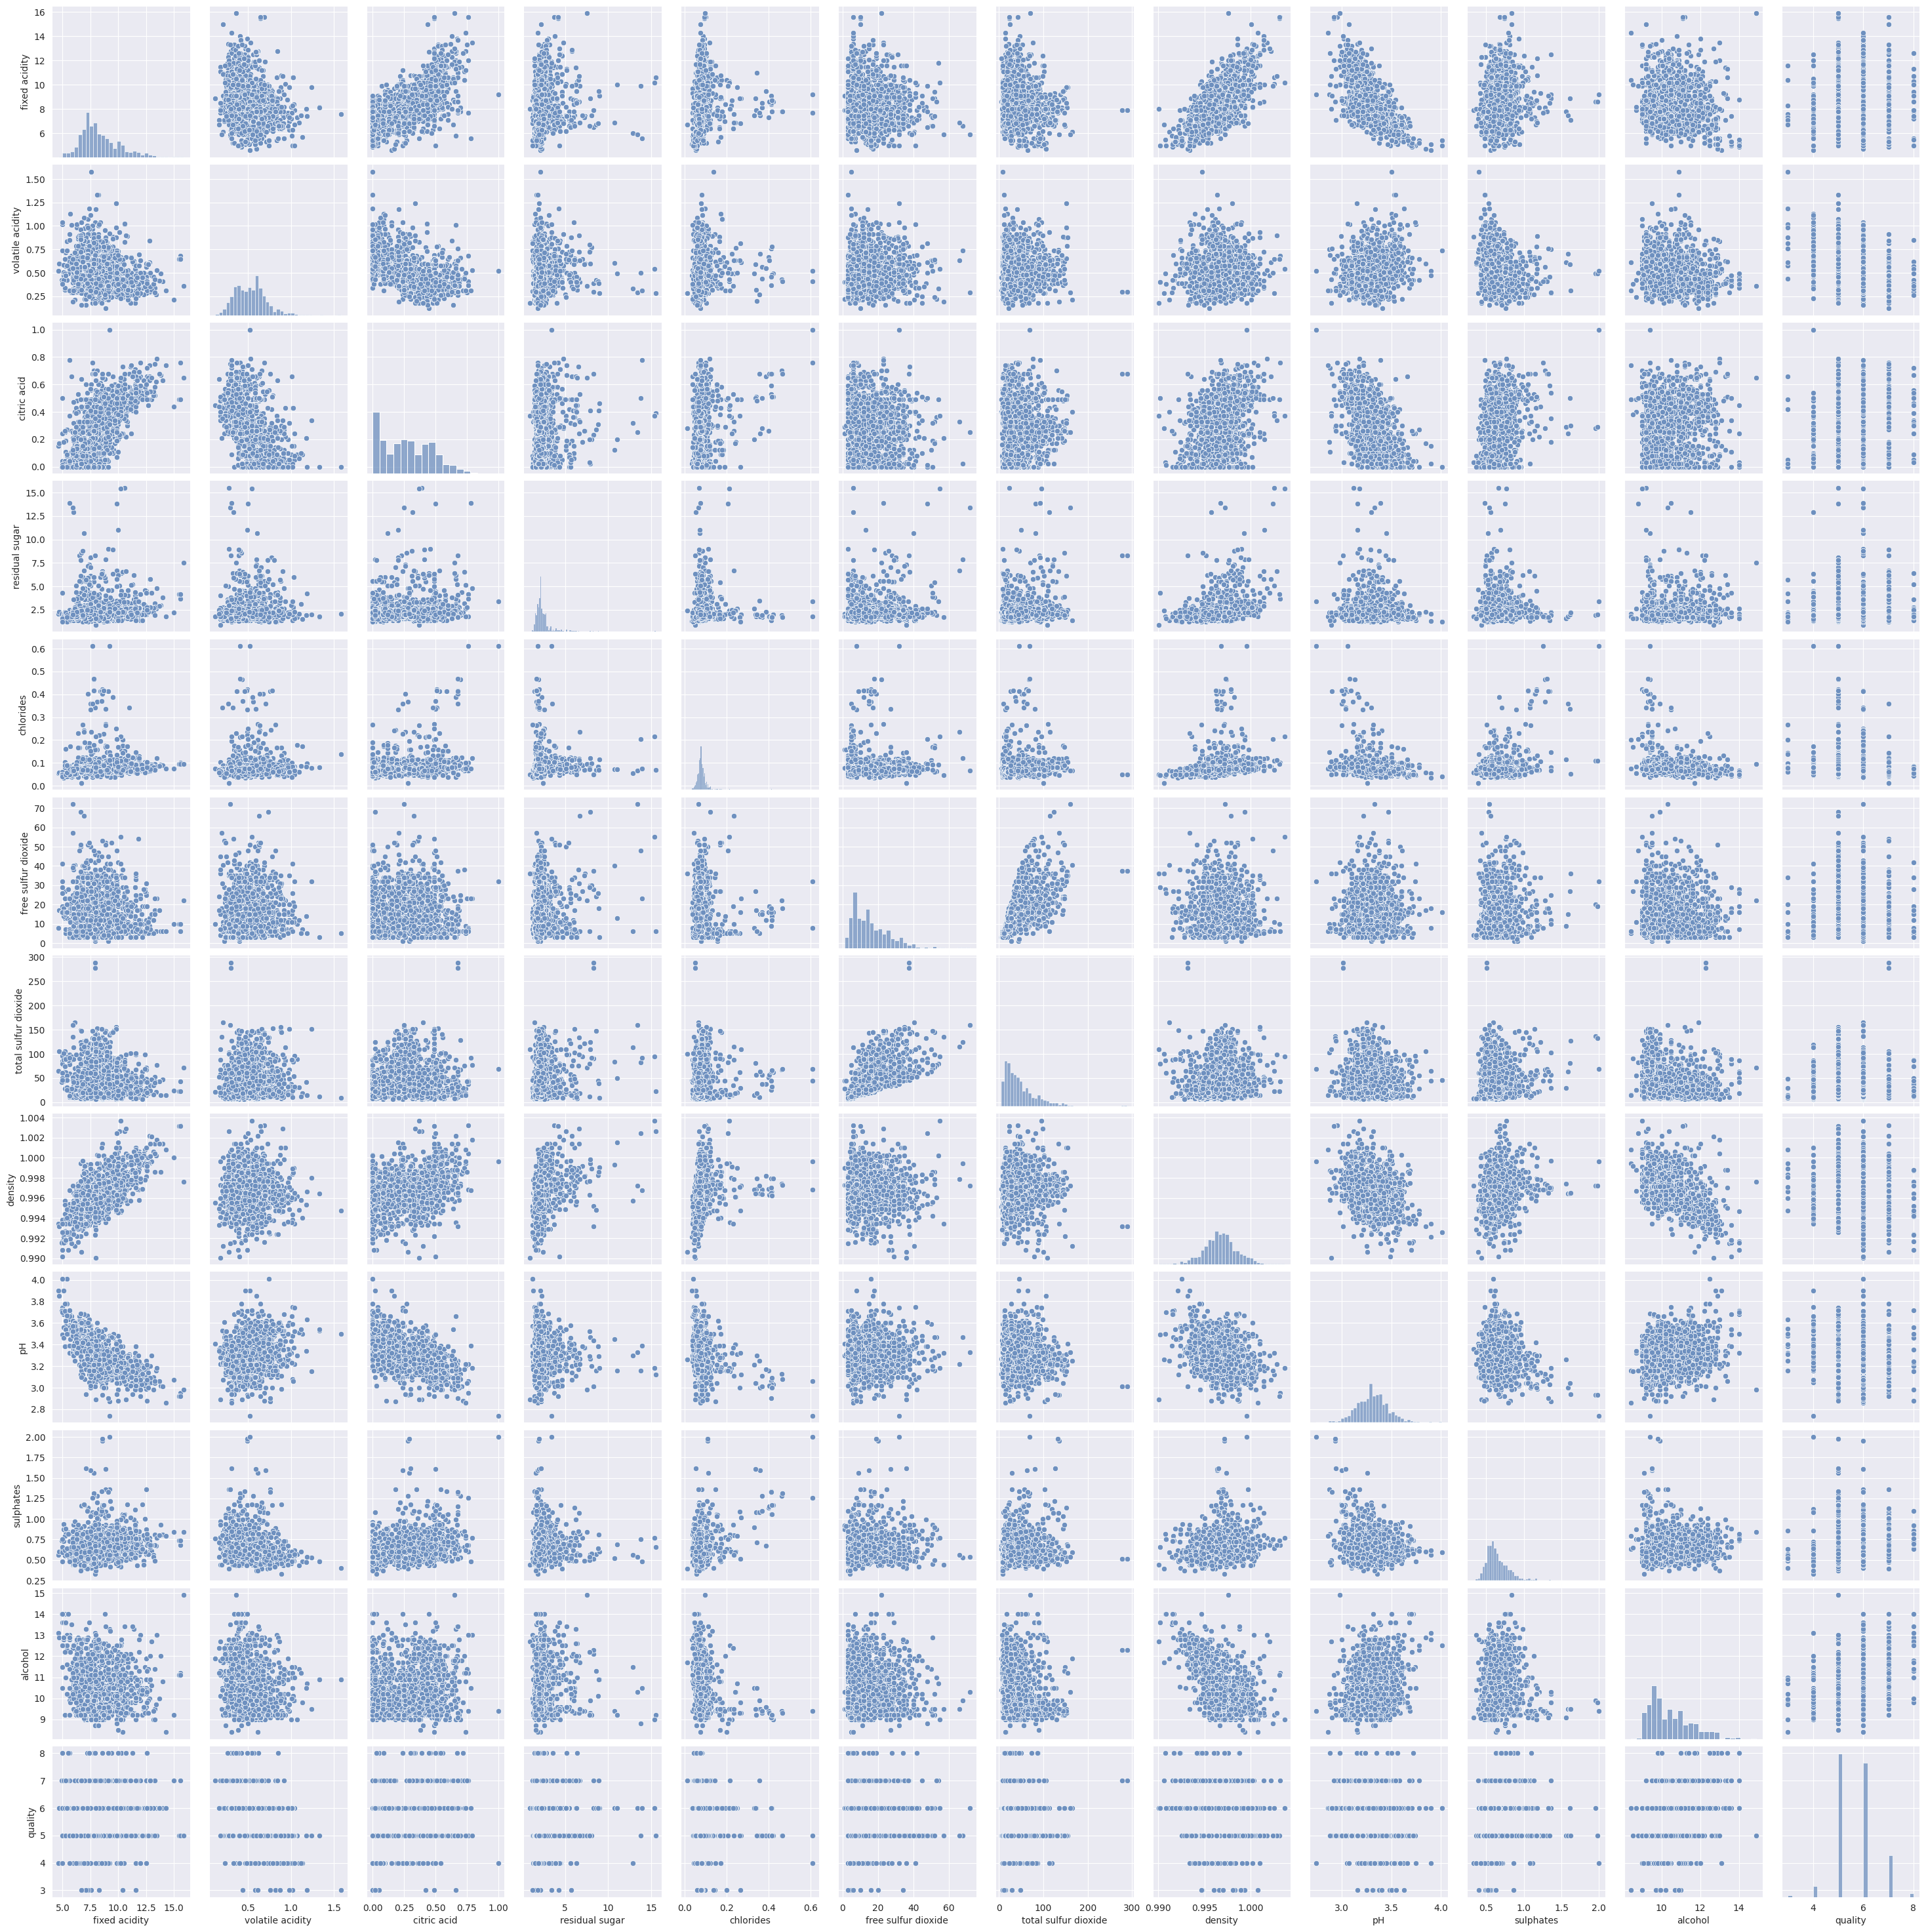

In [546]:
ax = sns.pairplot(df_wine)

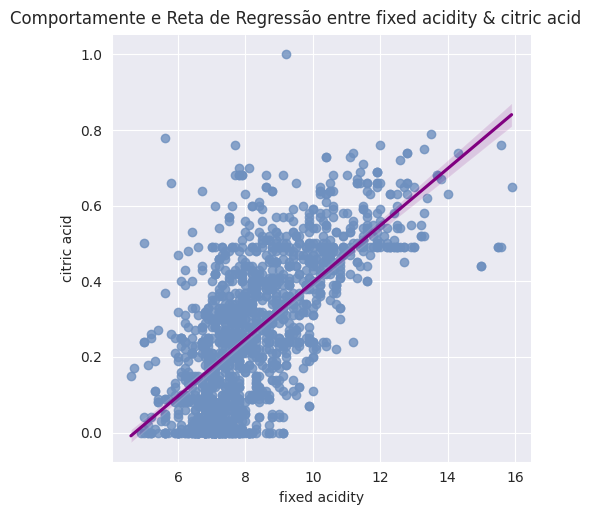

In [547]:
ax = sns.lmplot(x = 'fixed acidity', y = 'citric acid', data = df_wine,
                line_kws={'color': 'purple'});
ax.fig.suptitle('Comportamente e Reta de Regressão entre fixed acidity & citric acid',
                y = 1.02);

# **Regrassão Linear Simples**

# Passo a passo

> # Citric Acid & Fixed Acidity

## Variáveis Dependente e Indepentente

In [548]:
# Variável dependente
y = df_wine['citric acid'].values

# Variável independente
X = df_wine['fixed acidity'].values

X = X.reshape(-1, 1)

## Separando dados de treino e teste

In [549]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }')

len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480


## Criando o modelo

In [550]:
modelo = LinearRegression()

In [551]:
modelo.fit(X_train, y_train)

LinearRegression()

### Coeficiente de Determinação (R²)

> * O quão próximo os dados estão da reta ajustada

In [552]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.46


In [553]:
y_previsto = modelo.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')


R² previsto = 0.42


### Coeficiente de Correlação

In [554]:
print(f'Coeficiente de Correlação entre {df_wine.columns[0]} e {df_wine.columns[2]}: {np.corrcoef(X.reshape(1, -1), y)[0][1].round(2)}')

Coeficiente de Correlação entre fixed acidity e citric acid: 0.67


## Gráfico da Regressão Linear

Text(0, 0.5, 'Citric Acid')

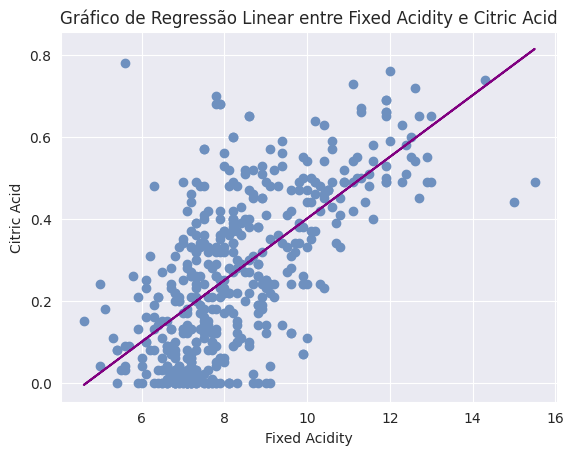

In [555]:
plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Fixed Acidity e Citric Acid')
plt.plot(X_test, modelo.predict(X_test), color = 'purple')
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')

### Resíduos
$Resíduos = Y real - Y previsto$
* Um resíduo é uma medida de quão bem uma reta se ajusta a um ponto individual
* Verificando a hipótese de variância constante dos resíduos
* O melhor cenário seria ter os resíduos em um intervalo reto constante

<Axes: title={'center': 'Residuo X Previsao'}, xlabel='Fixed Acidity - Previsao', ylabel='Residuos'>

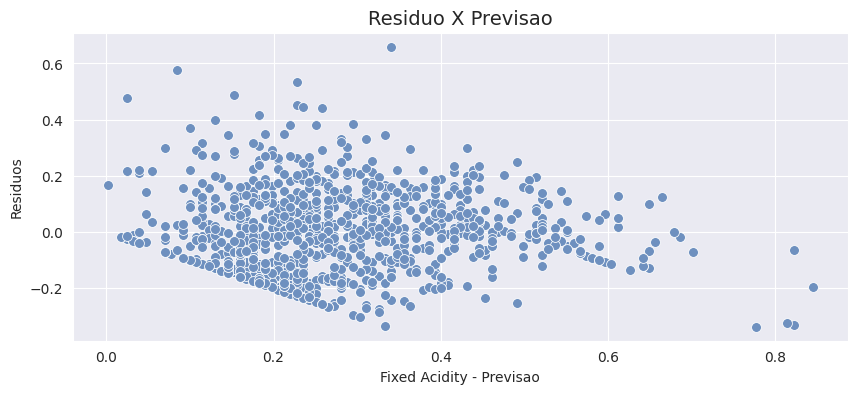

In [556]:
y_previsto_train = modelo.predict(X_train)
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x = y_previsto_train, y = residuo, s=50) # s= , tamanho dos pontos

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_xlabel('Fixed Acidity - Previsao')
ax.set_ylabel('Residuos')
ax

<Axes: title={'center': 'Residuo X Previsao'}, xlabel='Fixed Acidity - Previsao', ylabel='Residuos²'>

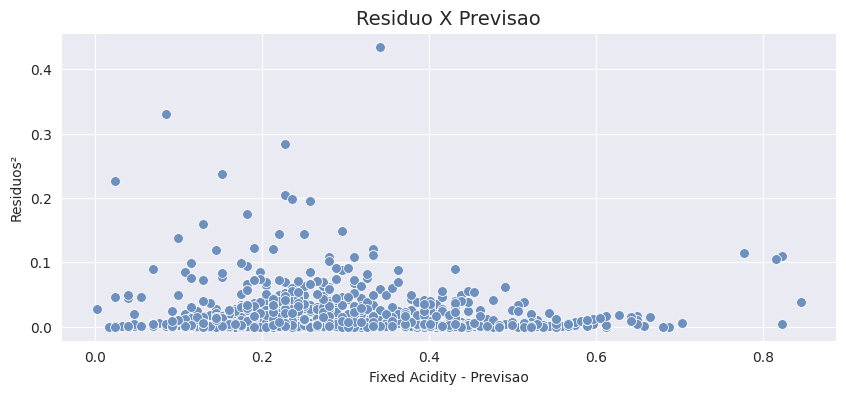

In [557]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s=50)

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_xlabel('Fixed Acidity - Previsao')
ax.set_ylabel('Residuos²')
ax

<ipython-input-558-171fc966a5cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuicao de frequencias dos residuos'}, xlabel='Fixed Acidity', ylabel='Density'>

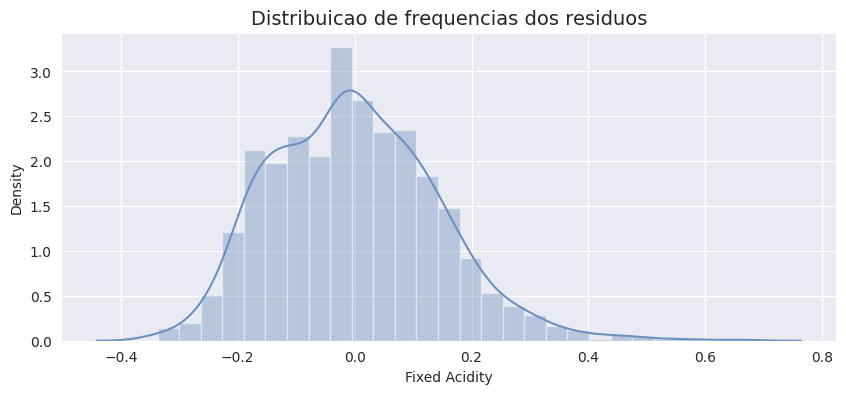

In [558]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuicao de frequencias dos residuos', fontsize = 14)
ax.set_xlabel('Fixed Acidity')
ax

> * O histograma deve ter um comportamento normal
> * Neste caso não é uma distribuição normal

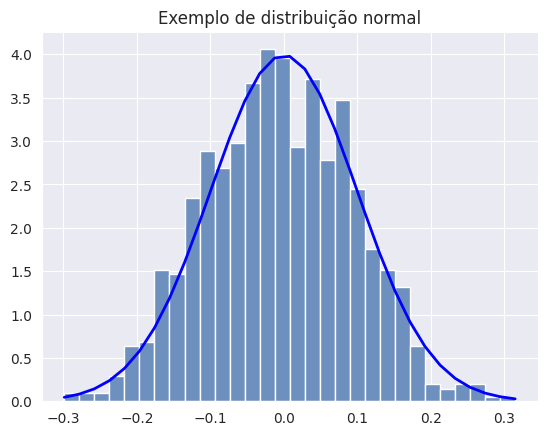

In [600]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='b')
plt.title('Exemplo de distribuição normal')
plt.show()

# Resumido

> # Fixed Acidity & Density

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.43
R² previsto = 0.43
Coeficiente de Correlação entre fixed acidity e density: 0.67


Text(0, 0.5, 'Fixed acidity')

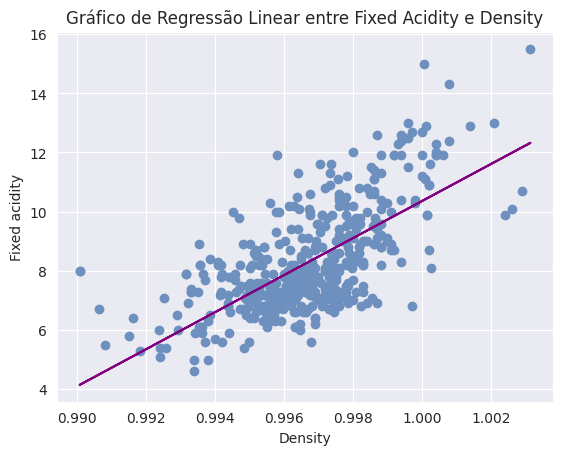

In [560]:
# Variável dependente
y = df_wine['fixed acidity'].values

# Variável independente
X = df_wine['density'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Determinação Previsto
y_previsto = modelo.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')

# Coeficiente de Correlação
print(f'Coeficiente de Correlação entre {df_wine.columns[0]} e {df_wine.columns[7]}: {np.corrcoef(X.reshape(1, -1), y)[0][1].round(2)}')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Fixed Acidity e Density')
plt.plot(X_test, modelo.predict(X_test), color = 'purple')
plt.xlabel('Density')
plt.ylabel('Fixed acidity')

<Axes: title={'center': 'Residuo X Previsao'}>

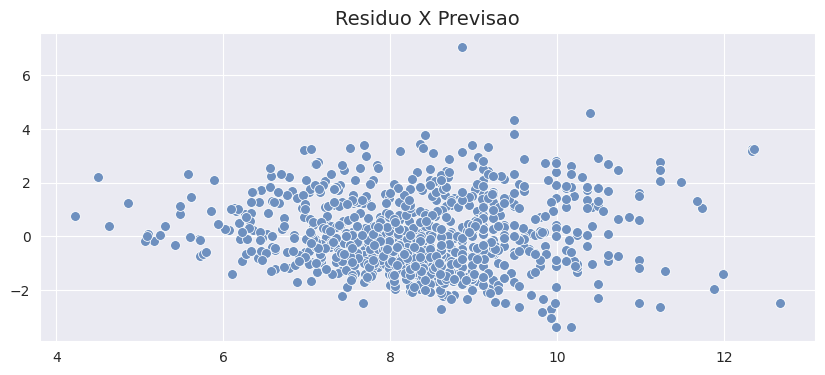

In [561]:
y_previsto_train = modelo.predict(X_train)
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x = y_previsto_train, y = residuo, s=50) # s= , tamanho dos pontos

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax

<Axes: title={'center': 'Residuo X Previsao'}, ylabel='Residuos²'>

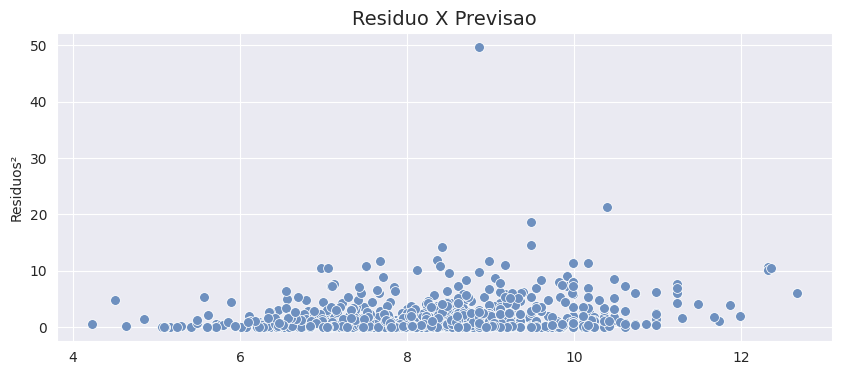

In [562]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s=50)

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_ylabel('Residuos²')
ax

<ipython-input-563-171fc966a5cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuicao de frequencias dos residuos'}, xlabel='Fixed Acidity', ylabel='Density'>

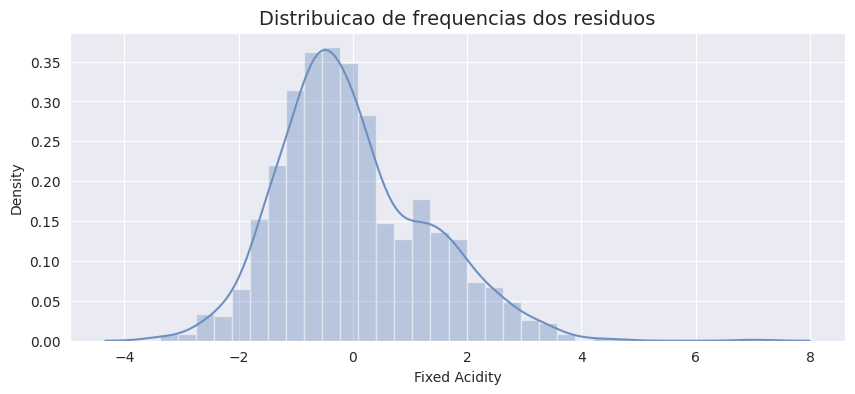

In [563]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuicao de frequencias dos residuos', fontsize = 14)
ax.set_xlabel('Fixed Acidity')
ax

> # Free Sulfur Dioxide & Total Sulfur Dioxide

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.48
R² previsto = 0.48
Coeficiente de Correlação entre free sulfur dioxide e total sulfur dioxide: 0.67


Text(0, 0.5, 'Free sulfur dioxide')

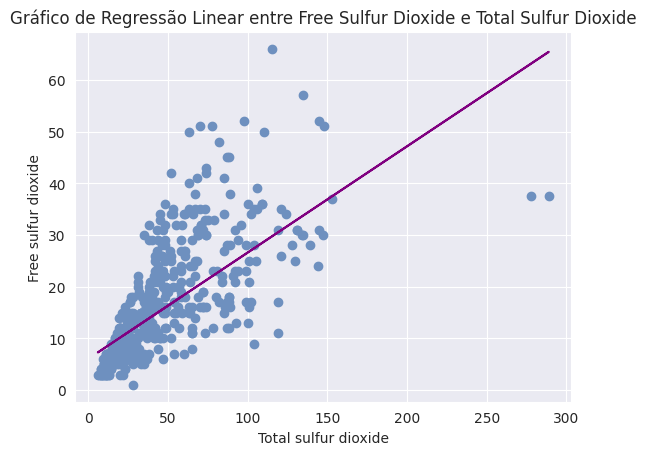

In [564]:
# Variável dependente
y = df_wine['free sulfur dioxide'].values

# Variável independente
X = df_wine['total sulfur dioxide'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Determinação Previsto
y_previsto = modelo.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')

# Coeficiente de Correlação
print(f'Coeficiente de Correlação entre {df_wine.columns[5]} e {df_wine.columns[6]}: {np.corrcoef(X.reshape(1, -1), y)[0][1].round(2)}')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Free Sulfur Dioxide e Total Sulfur Dioxide')
plt.plot(X_test, modelo.predict(X_test), color = 'purple')
plt.xlabel('Total sulfur dioxide')
plt.ylabel('Free sulfur dioxide')

<Axes: title={'center': 'Residuo X Previsao'}>

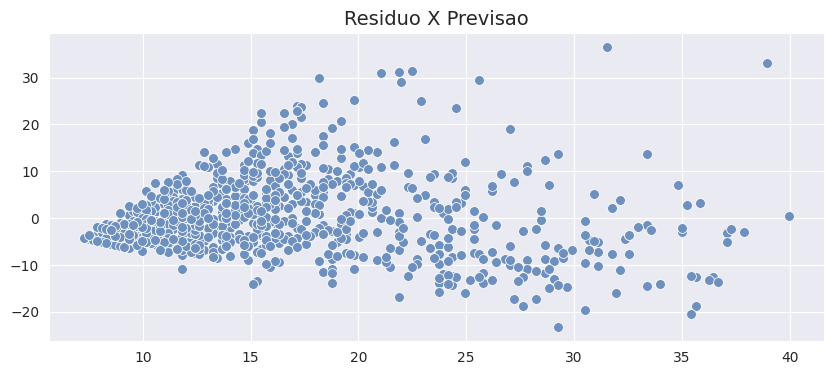

In [565]:
y_previsto_train = modelo.predict(X_train)
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x = y_previsto_train, y = residuo, s=50) # s= , tamanho dos pontos

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax

<Axes: title={'center': 'Residuo X Previsao'}, ylabel='Residuos²'>

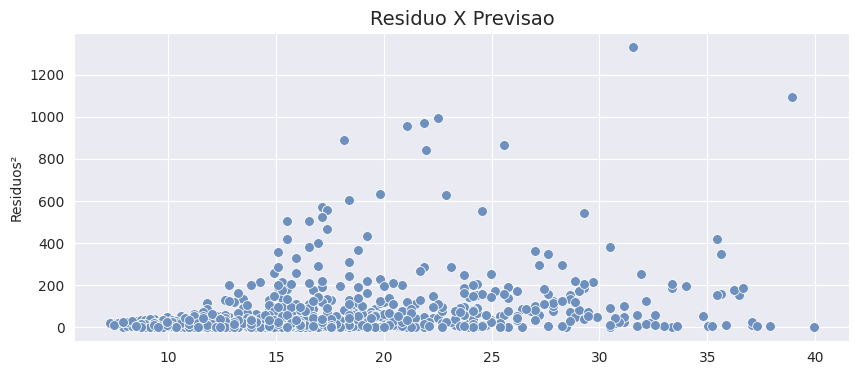

In [566]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s=50)

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_ylabel('Residuos²')
ax

<ipython-input-567-171fc966a5cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuicao de frequencias dos residuos'}, xlabel='Fixed Acidity', ylabel='Density'>

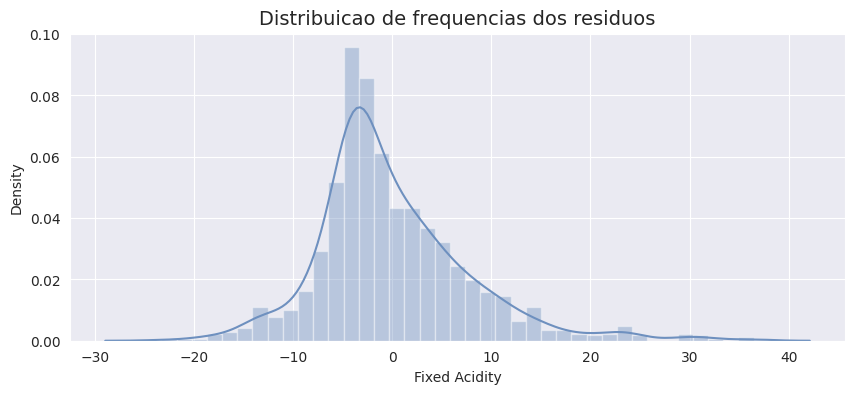

In [567]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuicao de frequencias dos residuos', fontsize = 14)
ax.set_xlabel('Fixed Acidity')
ax

> # Fixed Acidity & pH

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.51
R² previsto = 0.51
Coeficiente de Correlação entre fixed acidity e pH: -0.68


Text(0, 0.5, 'Fixed Acidity')

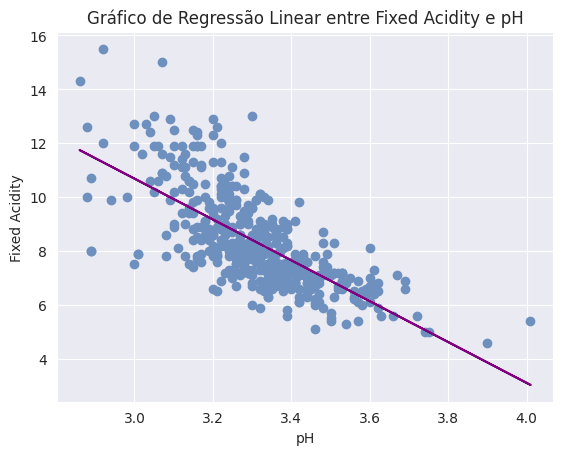

In [568]:
# Variável dependente
y = df_wine['fixed acidity'].values

# Variável independente
X = df_wine['pH'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Determinação Previsto
y_previsto = modelo.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')

# Coeficiente de Correlação
print(f'Coeficiente de Correlação entre {df_wine.columns[0]} e {df_wine.columns[8]}: {np.corrcoef(X.reshape(1, -1), y)[0][1].round(2)}')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Fixed Acidity e pH')
plt.plot(X_test, modelo.predict(X_test), color = 'purple')
plt.xlabel('pH')
plt.ylabel('Fixed Acidity')

<Axes: title={'center': 'Residuo X Previsao'}>

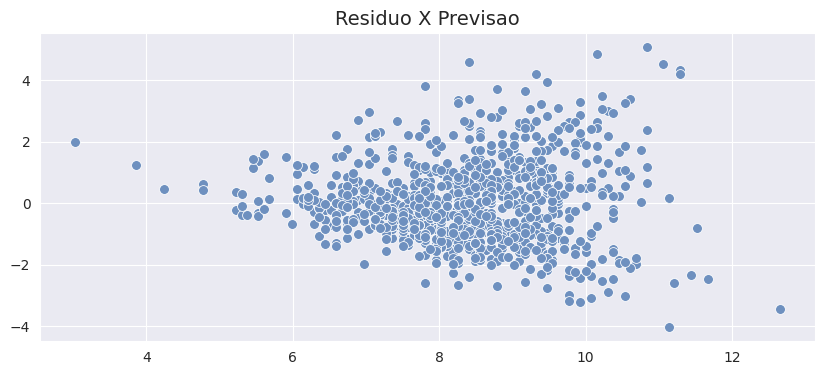

In [569]:
y_previsto_train = modelo.predict(X_train)
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x = y_previsto_train, y = residuo, s=50) # s= , tamanho dos pontos

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax

<Axes: title={'center': 'Residuo X Previsao'}, ylabel='Residuos²'>

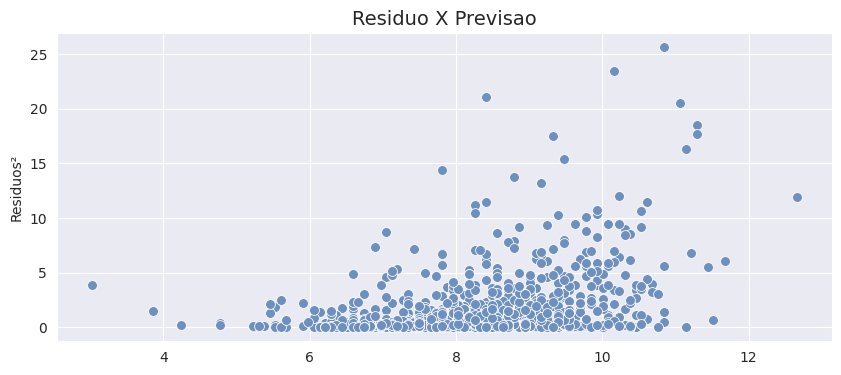

In [570]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s=50)

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_ylabel('Residuos²')
ax

<ipython-input-571-171fc966a5cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuicao de frequencias dos residuos'}, xlabel='Fixed Acidity', ylabel='Density'>

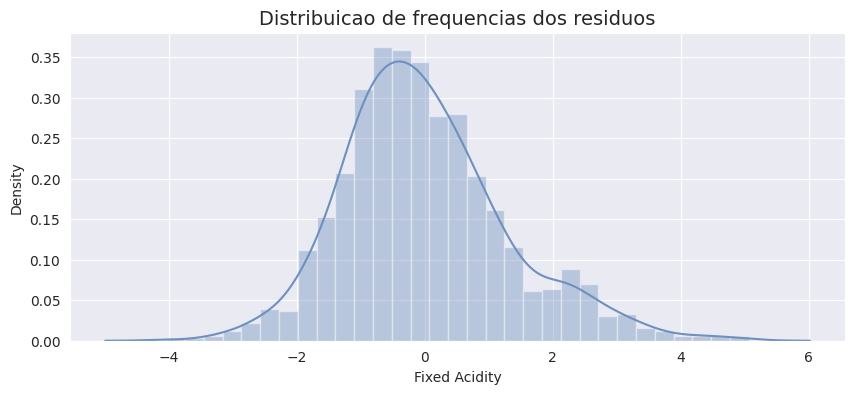

In [571]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuicao de frequencias dos residuos', fontsize = 14)
ax.set_xlabel('Fixed Acidity')
ax

> # Citric Acid & Volatile Acidity

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.34
R² previsto = 0.34
Coeficiente de Correlação entre citric acid e volatile acidity: -0.55


Text(0, 0.5, 'Citric Acid')

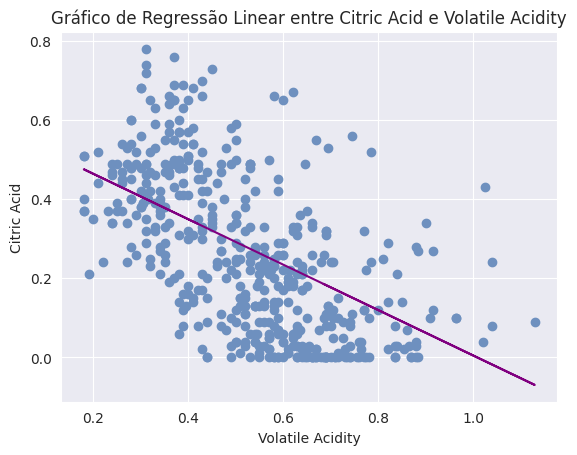

In [572]:
# Variável dependente
y = df_wine['citric acid'].values

# Variável independente
X = df_wine['volatile acidity'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Determinação Previsto
y_previsto = modelo.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')

# Coeficiente de Correlação
print(f'Coeficiente de Correlação entre {df_wine.columns[2]} e {df_wine.columns[1]}: {np.corrcoef(X.reshape(1, -1), y)[0][1].round(2)}')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Citric Acid e Volatile Acidity')
plt.plot(X_test, modelo.predict(X_test), color = 'purple')
plt.xlabel('Volatile Acidity')
plt.ylabel('Citric Acid')

<Axes: title={'center': 'Residuo X Previsao'}>

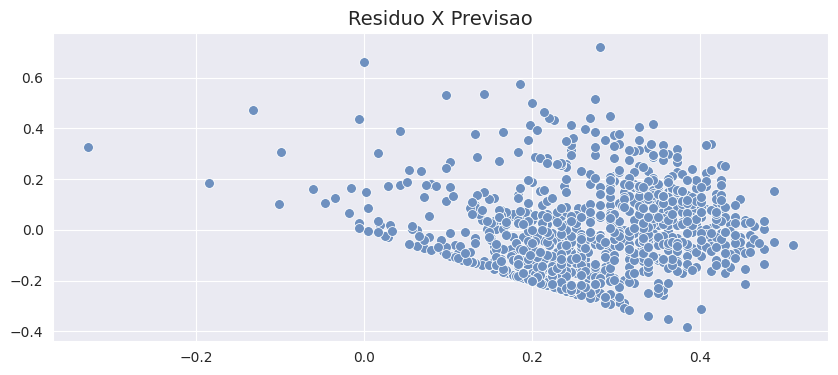

In [573]:
y_previsto_train = modelo.predict(X_train)
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x = y_previsto_train, y = residuo, s=50) # s= , tamanho dos pontos

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax

<Axes: title={'center': 'Residuo X Previsao'}, ylabel='Residuos²'>

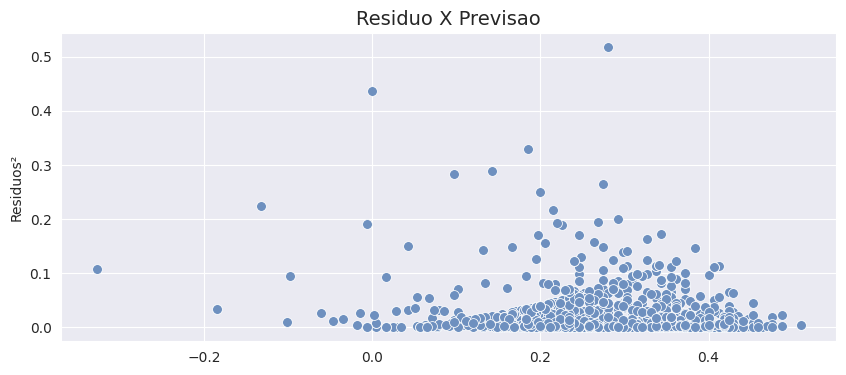

In [574]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s=50)

ax.figure.set_size_inches(10, 4)
ax.set_title('Residuo X Previsao', fontsize = 14)
ax.set_ylabel('Residuos²')
ax

<ipython-input-575-171fc966a5cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuicao de frequencias dos residuos'}, xlabel='Fixed Acidity', ylabel='Density'>

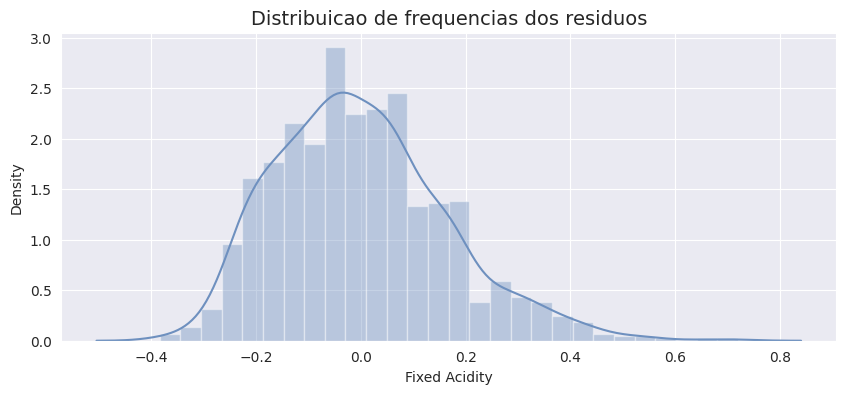

In [575]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(10, 4)
ax.set_title('Distribuicao de frequencias dos residuos', fontsize = 14)
ax.set_xlabel('Fixed Acidity')
ax

# **Regressão Linear Múltipla Quality**

In [576]:
df_wine.corr().round(4)

fixed acidity  volatile acidity  citric acid  \
fixed acidity                1.0000           -0.2561       0.6717   
volatile acidity            -0.2561            1.0000      -0.5525   
citric acid                  0.6717           -0.5525       1.0000   
residual sugar               0.1148            0.0019       0.1436   
chlorides                    0.0937            0.0613       0.2038   
free sulfur dioxide         -0.1538           -0.0105      -0.0610   
total sulfur dioxide        -0.1132            0.0765       0.0355   
density                      0.6680            0.0220       0.3649   
pH                          -0.6830            0.2349      -0.5419   
sulphates                    0.1830           -0.2610       0.3128   
alcohol                     -0.0617           -0.2023       0.1099   
quality                      0.1241           -0.3906       0.2264   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                 0.1148     0.0937              -0.1538   
volatile acidity              0.0019     0.0613              -0.0105   
citric acid                   0.1436     0.2038              -0.0610   
residual sugar                1.0000     0.0556               0.1870   
chlorides                     0.0556     1.0000               0.0056   
free sulfur dioxide           0.1870     0.0056               1.0000   
total sulfur dioxide          0.2030     0.0474               0.6677   
density                       0.3553     0.2006              -0.0219   
pH                           -0.0857    -0.2650               0.0704   
sulphates                     0.0055     0.3713               0.0517   
alcohol                       0.0421    -0.2211              -0.0694   
quality                       0.0137    -0.1289              -0.0507   

                      total sulfur dioxide  density      pH  sulphates  \
fixed acidity                      -0.1132   0.6680 -0.6830     0.1830   
volatile acidity                    0.0765   0.0220  0.2349    -0.2610   
citric acid                         0.0355   0.3649 -0.5419     0.3128   
residual sugar                      0.2030   0.3553 -0.0857     0.0055   
chlorides                           0.0474   0.2006 -0.2650     0.3713   
free sulfur dioxide                 0.6677  -0.0219  0.0704     0.0517   
total sulfur dioxide                1.0000   0.0713 -0.0665     0.0429   
density                             0.0713   1.0000 -0.3417     0.1485   
pH                                 -0.0665  -0.3417  1.0000    -0.1966   
sulphates                           0.0429   0.1485 -0.1966     1.0000   
alcohol                            -0.2057  -0.4962  0.2056     0.0936   
quality                            -0.1851  -0.1749 -0.0577     0.2514   

                      alcohol  quality  
fixed acidity         -0.0617   0.1241  
volatile acidity      -0.2023  -0.3906  
citric acid            0.1099   0.2264  
residual sugar         0.0421   0.0137  
chlorides             -0.2211  -0.1289  
free sulfur dioxide   -0.0694  -0.0507  
total sulfur dioxide  -0.2057  -0.1851  
density               -0.4962  -0.1749  
pH                     0.2056  -0.0577  
sulphates              0.0936   0.2514  
alcohol                1.0000   0.4762  
quality                0.4762   1.0000

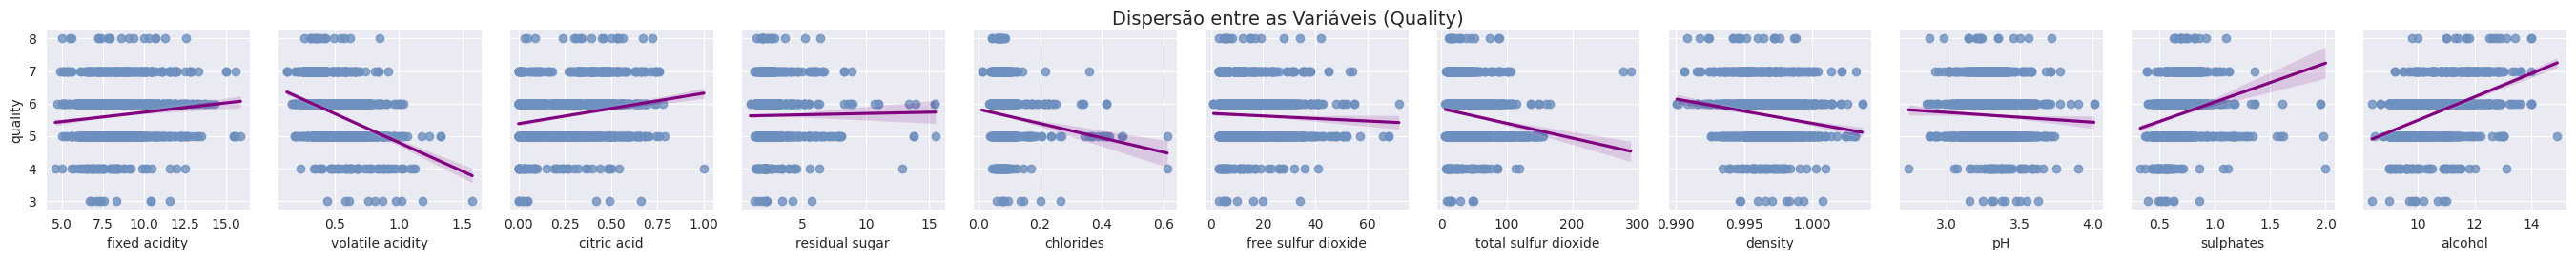

In [577]:
ax = sns.pairplot(df_wine,
                  y_vars='quality', 
                  x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
                  kind='reg', plot_kws={'line_kws':{'color':'purple'}})
ax.fig.suptitle('Dispersão entre as Variáveis (Quality)', fontsize = 14, y = 1.05)
ax

## Variáveis dependentes e independentes

In [578]:
# Variável dependente
y = df_wine.iloc[:, 11].values

# Variável independente
X = df_wine.iloc[:, :-1].values

In [579]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }')

len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480


In [580]:
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [581]:
modelo_multipla = LinearRegression()

In [582]:
modelo_multipla.fit(X_train, y_train)

LinearRegression()

In [583]:
print(f'R² = {modelo_multipla.score(X_train, y_train).round(2)}')

R² = 0.34


In [584]:
y_previsto = modelo_multipla.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')

R² previsto = 0.4


Text(0.5, 1.0, 'Gráfico da Regressão Múltipla')

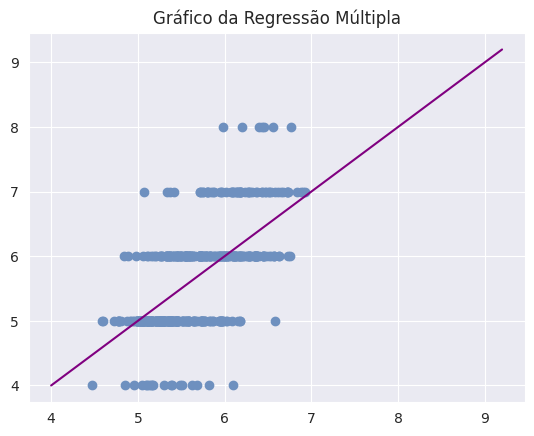

In [585]:
def regression_line(y):
  return np.arange(min(y_test), 1.2*max(y_test), (max(y_test) - min(y_test)) / 10)

plt.plot(y_previsto, y_test, 'o')
xl = regression_line(y_test)
yl = regression_line(y_test)
plt.plot(xl, yl, '-', c = 'purple')
plt.title('Gráfico da Regressão Múltipla')

## Usando OLS

In [586]:
modelo_multipla_ajustado = sm_api.OLS(df_wine.iloc[:, 11], df_wine.iloc[:, :-1])

modelo_multipla_treinado = modelo_multipla_ajustado.fit()

modelo_multipla_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.108e+04
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        20:05:10   Log-Likelihood:                         -1569.7
No. Observations:                1599   AIC:                                      3161.
Df Residuals:                    1588   BIC:                                      3221.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0042      0.016      0.255      0.799      -0.028       0.036
volatile acidity        -1.0997      0.120     -9.157      0.000      -1.335      -0.864
citric acid             -0.1841      0.147     -1.251      0.211      -0.473       0.105
residual sugar           0.0071      0.012      0.587      0.557      -0.017       0.031
chlorides               -1.9114      0.418     -4.575      0.000      -2.731      -1.092
free sulfur dioxide      0.0045      0.002      2.102      0.036       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.565      0.000      -0.005      -0.002
density                  4.5291      0.625      7.243      0.000       3.303       5.756
pH                      -0.5229      0.160     -3.268      0.001      -0.837      -0.209
sulphates                0.8871      0.111      8.006      0.000       0.670       1.104
alcohol                  0.2970      0.017     17.217      0.000       0.263       0.331
==============================================================================
Omnibus:                       25.388   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.530
Skew:                          -0.159   Prob(JB):                     7.09e-09
Kurtosis:                       3.680   Cond. No.                     2.47e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> * Quanto mais próximo de 0 o p-value estiver, melhor
> * Variáveis a serem desconsideradas: fixed acidity, citric acid, residual sugar
> * Pior variável: fixed acidity

# **Regressão Linear Múltipla Fixed Acidity**

In [587]:
df_wine.corr().round(4)

fixed acidity  volatile acidity  citric acid  \
fixed acidity                1.0000           -0.2561       0.6717   
volatile acidity            -0.2561            1.0000      -0.5525   
citric acid                  0.6717           -0.5525       1.0000   
residual sugar               0.1148            0.0019       0.1436   
chlorides                    0.0937            0.0613       0.2038   
free sulfur dioxide         -0.1538           -0.0105      -0.0610   
total sulfur dioxide        -0.1132            0.0765       0.0355   
density                      0.6680            0.0220       0.3649   
pH                          -0.6830            0.2349      -0.5419   
sulphates                    0.1830           -0.2610       0.3128   
alcohol                     -0.0617           -0.2023       0.1099   
quality                      0.1241           -0.3906       0.2264   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                 0.1148     0.0937              -0.1538   
volatile acidity              0.0019     0.0613              -0.0105   
citric acid                   0.1436     0.2038              -0.0610   
residual sugar                1.0000     0.0556               0.1870   
chlorides                     0.0556     1.0000               0.0056   
free sulfur dioxide           0.1870     0.0056               1.0000   
total sulfur dioxide          0.2030     0.0474               0.6677   
density                       0.3553     0.2006              -0.0219   
pH                           -0.0857    -0.2650               0.0704   
sulphates                     0.0055     0.3713               0.0517   
alcohol                       0.0421    -0.2211              -0.0694   
quality                       0.0137    -0.1289              -0.0507   

                      total sulfur dioxide  density      pH  sulphates  \
fixed acidity                      -0.1132   0.6680 -0.6830     0.1830   
volatile acidity                    0.0765   0.0220  0.2349    -0.2610   
citric acid                         0.0355   0.3649 -0.5419     0.3128   
residual sugar                      0.2030   0.3553 -0.0857     0.0055   
chlorides                           0.0474   0.2006 -0.2650     0.3713   
free sulfur dioxide                 0.6677  -0.0219  0.0704     0.0517   
total sulfur dioxide                1.0000   0.0713 -0.0665     0.0429   
density                             0.0713   1.0000 -0.3417     0.1485   
pH                                 -0.0665  -0.3417  1.0000    -0.1966   
sulphates                           0.0429   0.1485 -0.1966     1.0000   
alcohol                            -0.2057  -0.4962  0.2056     0.0936   
quality                            -0.1851  -0.1749 -0.0577     0.2514   

                      alcohol  quality  
fixed acidity         -0.0617   0.1241  
volatile acidity      -0.2023  -0.3906  
citric acid            0.1099   0.2264  
residual sugar         0.0421   0.0137  
chlorides             -0.2211  -0.1289  
free sulfur dioxide   -0.0694  -0.0507  
total sulfur dioxide  -0.2057  -0.1851  
density               -0.4962  -0.1749  
pH                     0.2056  -0.0577  
sulphates              0.0936   0.2514  
alcohol                1.0000   0.4762  
quality                0.4762   1.0000

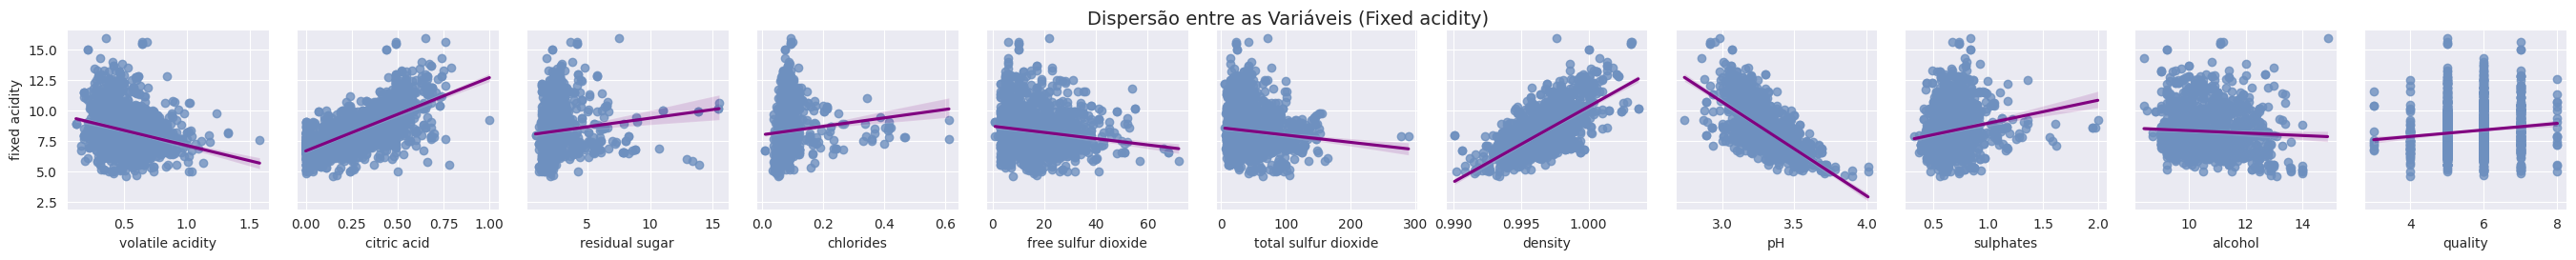

In [588]:
ax = sns.pairplot(df_wine,
                  y_vars='fixed acidity', 
                  x_vars=['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'],
                  kind='reg', plot_kws={'line_kws':{'color':'purple'}})
ax.fig.suptitle('Dispersão entre as Variáveis (Fixed acidity)', fontsize = 14, y = 1.05)
ax

## Variáveis dependentes e independentes

In [589]:
# Variável dependente
y = df_wine.iloc[:, 0].values

# Variável independente
X = df_wine.iloc[:, :-1].values

In [590]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }')

len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480


In [591]:
modelo_multipla = LinearRegression()

In [592]:
modelo_multipla.fit(X_train, y_train)

LinearRegression()

In [593]:
print(f'R² = {modelo_multipla.score(X_train, y_train).round(2)}')

R² = 1.0


In [594]:
y_previsto = modelo_multipla.predict(X_test)
print(f'R² previsto = {r2_score(y_test, y_previsto).round(2)}')

R² previsto = 1.0


Text(0.5, 1.0, 'Gráfico da Regressão Múltipla')

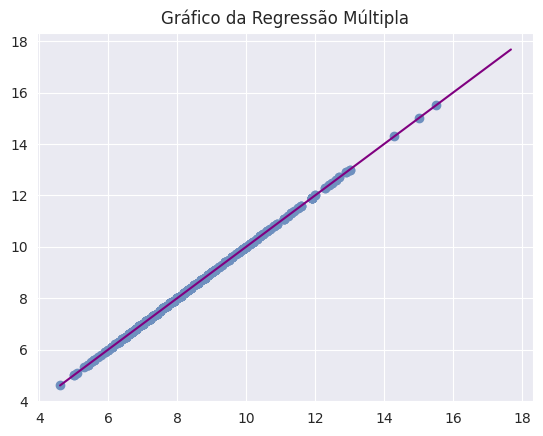

In [595]:
def regression_line_multiple(y):
  return np.arange(min(y_test), 1.2*max(y_test), (max(y_test) - min(y_test)) / 10)

plt.plot(y_previsto, y_test, 'o')
xl = regression_line_multiple(y_test)
yl = regression_line_multiple(y_test)
plt.plot(xl, yl, '-', c = 'purple')
plt.title('Gráfico da Regressão Múltipla')

## Usando OLS

In [596]:
modelo_multipla_ajustado = sm_api.OLS(df_wine.iloc[:, 0], df_wine.iloc[:, :-1])

modelo_multipla_treinado = modelo_multipla_ajustado.fit()

modelo_multipla_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          fixed acidity   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.752e+29
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        20:05:19   Log-Likelihood:                          44169.
No. Observations:                1599   AIC:                                 -8.832e+04
Df Residuals:                    1588   BIC:                                 -8.826e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            1.0000   6.22e-15   1.61e+14      0.000       1.000       1.000
volatile acidity      1.811e-15   4.54e-14      0.040      0.968   -8.72e-14    9.08e-14
citric acid          -3.011e-15   5.56e-14     -0.054      0.957   -1.12e-13    1.06e-13
residual sugar       -2.552e-16   4.55e-15     -0.056      0.955   -9.19e-15    8.68e-15
chlorides             6.106e-15   1.58e-13      0.039      0.969   -3.04e-13    3.16e-13
free sulfur dioxide   3.639e-16   8.18e-16      0.445      0.656   -1.24e-15    1.97e-15
total sulfur dioxide -4.113e-15   2.75e-16    -14.976      0.000   -4.65e-15   -3.57e-15
density              -1.943e-15   2.36e-13     -0.008      0.993   -4.65e-13    4.62e-13
pH                    1.875e-15   6.05e-14      0.031      0.975   -1.17e-13     1.2e-13
sulphates            -3.615e-15   4.19e-14     -0.086      0.931   -8.57e-14    7.85e-14
alcohol              -1.354e-15   6.52e-15     -0.208      0.835   -1.41e-14    1.14e-14
==============================================================================
Omnibus:                      512.503   Durbin-Watson:                   0.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1780.202
Skew:                           1.565   Prob(JB):                         0.00
Kurtosis:                       7.114   Cond. No.                     2.47e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> * Maioria das variáveis poderiam ser desconsideradas